In [22]:
from keras.datasets import reuters
from keras import models
from keras import layers
from keras import optimizers
import numpy as np
import matplotlib.pyplot as plt

In [12]:
(train_data,train_labels),(test_data,test_labels)=reuters.load_data(num_words=10000)

In [13]:
def vectorize_sequences(sequences, dimension=10000):
    results=np.zeros((len(sequences), dimension))
    for i,sequence in enumerate(sequences):
        results[i,sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [14]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label]=1.
    return results


one_hot_train_labels=to_one_hot(train_labels)
one_hot_test_labels=to_one_hot(test_labels)

In [16]:
    model = models.Sequential()
    model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
    model.add(layers.Dense(64,activation='relu'))
    model.add(layers.Dense(46,activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [17]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [19]:
x_val=x_train[:1000]
partial_x_train=x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 300us/step - loss: 2.5328 - acc: 0.4957 - val_loss: 1.7222 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 172us/step - loss: 1.4484 - acc: 0.6874 - val_loss: 1.3499 - val_acc: 0.7070
Epoch 3/20
7982/7982 [==============================] - 2s 190us/step - loss: 1.1000 - acc: 0.7640 - val_loss: 1.1736 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 179us/step - loss: 0.8732 - acc: 0.8157 - val_loss: 1.0788 - val_acc: 0.7600
Epoch 5/20
7982/7982 [==============================] - 1s 186us/step - loss: 0.7059 - acc: 0.8477 - val_loss: 0.9864 - val_acc: 0.7790
Epoch 6/20
7982/7982 [==============================] - 1s 186us/step - loss: 0.5696 - acc: 0.8784 - val_loss: 0.9401 - val_acc: 0.8040
Epoch 7/20
7982/7982 [==============================] - 1s 179us/step - loss: 0.4624 - a

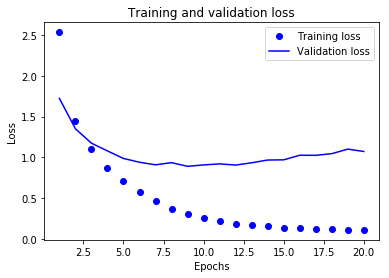

In [23]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

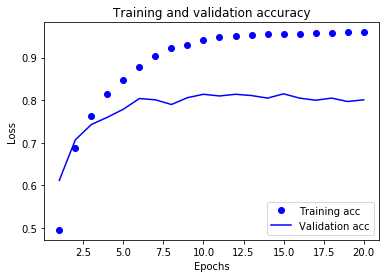

In [25]:
plt.clf()
#Clears the figure
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [26]:
model.fit(partial_x_train,
partial_y_train,
epochs=9,
batch_size=512,
validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 189us/step - loss: 0.1055 - acc: 0.9575 - val_loss: 1.1077 - val_acc: 0.7980
Epoch 2/9
7982/7982 [==============================] - 2s 198us/step - loss: 0.1022 - acc: 0.9579 - val_loss: 1.1130 - val_acc: 0.8040
Epoch 3/9
7982/7982 [==============================] - 1s 180us/step - loss: 0.1025 - acc: 0.9588 - val_loss: 1.0972 - val_acc: 0.7970
Epoch 4/9
7982/7982 [==============================] - 2s 191us/step - loss: 0.1029 - acc: 0.9573 - val_loss: 1.1220 - val_acc: 0.7960
Epoch 5/9
7982/7982 [==============================] - 2s 191us/step - loss: 0.0972 - acc: 0.9590 - val_loss: 1.1497 - val_acc: 0.8030
Epoch 6/9
7982/7982 [==============================] - 2s 192us/step - loss: 0.0991 - acc: 0.9565 - val_loss: 1.2274 - val_acc: 0.7900
Epoch 7/9
7982/7982 [==============================] - 2s 194us/step - loss: 0.0959 - acc: 0.9577 - val_loss: 1.1794 - val_acc: 0.7950
Epoch 8